# Casos hipotéticos

## Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,optimize
from processingModule import getCities
import tikzplotlib
#plt.style.use("bmh")
plt.style.use("seaborn")

## Modelo SIR

In [17]:
def SIR(y,t,beta,gamma):
    S,I,R = y
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return dS,dI,dR

## Valores Iniciales

In [18]:
N=1000
I0 = 1
S0 = N-I0
R0 = 0
vals = [(0.667,0.167),(0.5,0.167),(0.333,0.167)]
results = []

In [19]:
t = np.linspace(0.0,90,90)

In [20]:
for i in vals:
    beta,gamma = i
    results.append(integrate.odeint(SIR, (S0, I0, R0), t, args=(beta, gamma)))

In [21]:
figs=[]

## Susceptibles - Comparacion

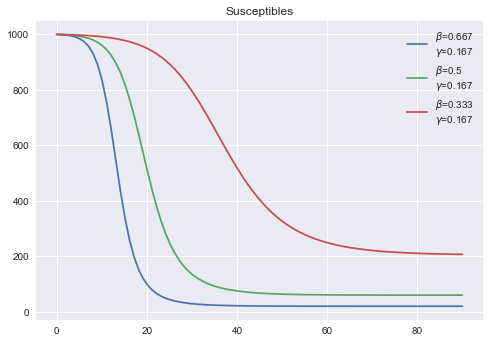

In [22]:
figs.append(plt.figure("Susceptibles"))
for i in range(0,len(vals)):
    plt.title("Susceptibles")
    plt.plot(t,results[i][:,0])
plt.legend([f"$\\beta$={i[0]}\n$\\gamma$={i[1]}" for i in vals],prop={'size': 10})

## Infectados - Comparacion

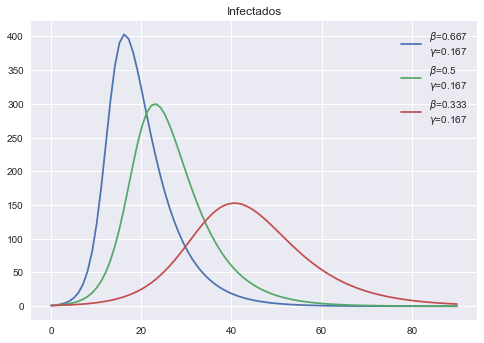

In [23]:
figs.append(plt.figure("Infectados"))
for i in range(0,len(vals)):
    plt.title("Infectados")
    plt.plot(t,results[i][:,1])
plt.legend([f"$\\beta$={i[0]}\n$\\gamma$={i[1]}" for i in vals],prop={'size': 10})

## Recuperados - Comparacion

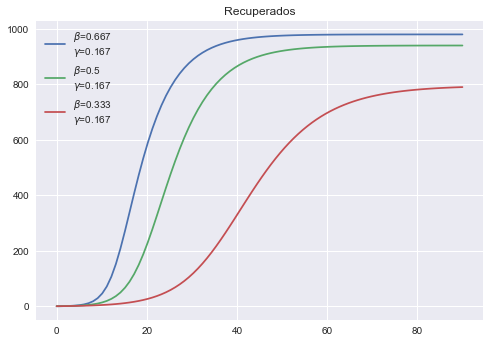

In [24]:
figs.append(plt.figure("Recuperados"))
for i in range(0,len(vals)):
    plt.title("Recuperados")
    plt.plot(t,results[i][:,2])
plt.legend([f"$\\beta$={i[0]}\n$\\gamma$={i[1]}" for i in vals],prop={'size': 10})

## Casos individuales

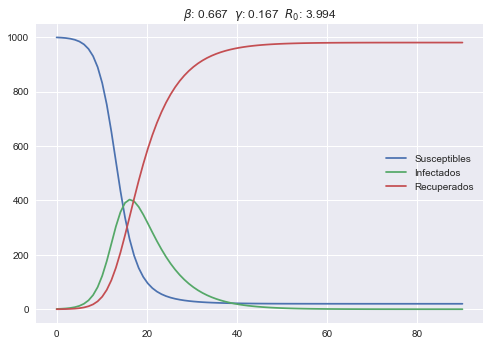

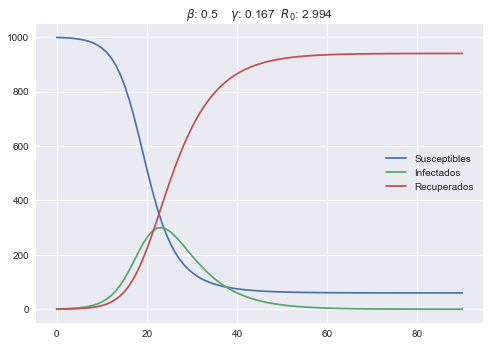

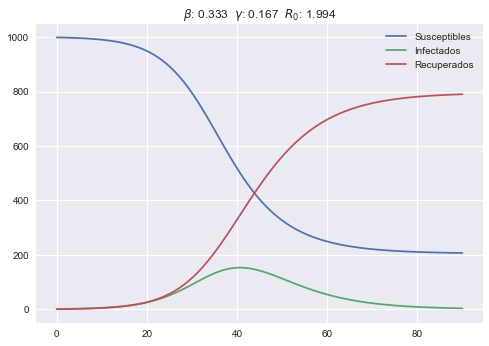

In [25]:
for i in range(0,len(vals)):
    figs.append(plt.figure(f"Comparison {i}"))
    plt.plot(t, results[i][:,0])
    plt.plot(t, results[i][:,1])
    plt.plot(t, results[i][:,2])
    plt.title(f"$\\beta$: {round(vals[i][0],3)}\t$\\gamma$: {round(vals[i][1],3)}\t $R_0$: {round(vals[i][0]/vals[i][1],3)}")
    plt.legend(["Susceptibles","Infectados","Recuperados"],prop={'size': 10})

## Infectados Acumulados

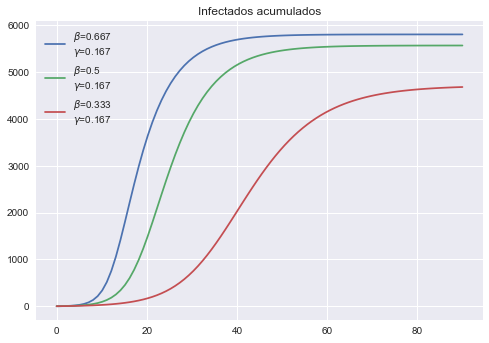

In [26]:
figs.append(plt.figure("Acumulados"))
for i in range(0,len(vals)):
    plt.plot(t,np.cumsum(results[i][:,1]))
plt.title("Infectados acumulados")
plt.legend([f"$\\beta$={i[0]}\n$\\gamma$={i[1]}" for i in vals],prop={'size': 10})
